**INSTRUCTIONS**



1.  The assignment contains four questions. A few bonus questions are mentioned. 
2.   This assignment is due on **6th Feb, 23:59 **(**No Further extensions**).
3.   Assignment must be implemented in Python 3 only.
4.   You are allowed to use libraries for data preprocessing (numpy, pandas etc) and for evaluation metrics, data visualization (matplotlib etc.).
5.   You will be evaluated not just on the overall performance of the model and also on the experimentation with hyper parameters, data prepossessing techniques etc.
6.   The report file must be a well documented jupyter notebook, explaining the experiments you have performed, evaluation metrics and corresponding code. The code must run and be able to reproduce the accuracies, figures/graphs etc.
7.   For all the questions, you must create a train-validation data split and test the hyperparameter tuning on the validation set. Your jupyter notebook must reflect the same.
8.   Any attempts at **plagiarism will be penalized heavily**.
9.   Make sure you run and save your notebooks before submission.
10.  For question 3 of the Decision Trees section, output your model's depth first traversal into ```outputimp.txt``` and submit it along with the ipynb file.
10. Naming convention for the ipynb file is ```<roll_number>_assign1.ipynb```
11. Compress your submission files into a zip file with the naming convention: ```<roll_number>_assign1.zip``` and submit in the portal.

#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [4]:
from __future__ import print_function
import time

In [5]:
# To read data from diamonds.csv
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error ,accuracy_score

import seaborn as sns

In [6]:
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
data['carat'] = data['carat'].astype(np.float)
data['depth'] = data['depth'].astype(np.float)
data['table'] = data['table'].astype(np.float)
data['price'] = data['price'].astype(np.float)
data['x'] = data['x'].astype(np.float)
data['y'] = data['y'].astype(np.float)
data['z'] = data['z'].astype(np.float)

In [9]:
data['cut'] = data['cut'].replace({'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4})

In [10]:
data['color'] = data['color'].replace({k: v for v, k in enumerate(sorted([*'DEFGHIJ',],reverse=True))})

In [11]:
data['clarity'] = data['clarity'].replace({k: v for v, k in enumerate(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])})

In [12]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [59]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,4,5,1,61.5,55.0,326.0,3.95,3.98,2.43
2,0.21,3,5,2,59.8,61.0,326.0,3.89,3.84,2.31
3,0.23,1,5,4,56.9,65.0,327.0,4.05,4.07,2.31
4,0.29,3,1,3,62.4,58.0,334.0,4.20,4.23,2.63
5,0.31,1,0,1,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,4,6,2,60.8,57.0,2757.0,5.75,5.76,3.50
53937,0.72,1,6,2,63.1,55.0,2757.0,5.69,5.75,3.61
53938,0.70,2,6,2,62.8,60.0,2757.0,5.66,5.68,3.56
53939,0.86,3,2,1,61.0,58.0,2757.0,6.15,6.12,3.74


In [81]:
X = data[['carat','cut','color','clarity','depth','table','x','y','z']]
y = data['price']
categoricals = [1,2,3]
X = X.to_numpy()
y = y.to_numpy()

In [82]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)



```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [12]:
# code for knn regression
class KNNRegressor():
    def __init__(self,k=3):
        self.k = k

    def train(self,X,y,categoricals=[]):
        self.X = X
        self.y = y
        self.categoricals = np.array([ True if i in categoricals else False for i in range(self.X.shape[1])])
        self.numericals = np.vectorize(lambda x: not x)(self.categoricals)
        
    def distance(self,x1,x2,num_p = 2,cat_p=2):
        return (np.linalg.norm((x1-x2)[self.categoricals],cat_p)*sum(self.categoricals) + \
                np.linalg.norm((x1-x2)[self.numericals],num_p)*sum(self.numericals))/self.X.shape[1]
        
    def predict(self,X,num_p=2,cat_p=2):
        y = np.zeros(X.shape[0])
        pbar = tqdm(total=X.shape[0])
        for idx,x in enumerate(X):
            distances = np.vectorize(self.distance,signature='(n),(n),(),()->()')(self.X,x,num_p,cat_p)
            dist_idxs = np.argsort(distances)[:self.k]
            y[idx] = np.mean(self.y[dist_idxs])
            pbar.update()
        pbar.refresh()
        return y

1. b) Do we need to normalise data? [If so Does it make any difference?].


In [83]:
# Yes we do need to normalize data. Otherwise due to different types of data in different ranges,
# some parameters will be much more dominant than others
X_train = (X_train - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_test = (X_test - X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

Here, Hamming Distance can be used by 0-norm of Integer Encoding, as it will be similar to Hamming Distance of one-hot encoding .

In [23]:
r2_list = list()
mae_list = list()
mse_list = list()
p_list = [0,1,2]
p_names = ['Hamming','Manhattan','Euclidean']
test_taken = 1000
for p in p_list:
    regressor = KNNRegressor(k=3)
    regressor.train(X_train,y_train,categoricals=categoricals)
    y_pred = regressor.predict(X_test[:test_taken],cat_p=p)

    r2_list.append(r2_score(y_test[:test_taken],y_pred))
    mse_list.append(mean_squared_error(y_test[:test_taken],y_pred))
    mae_list.append(mean_absolute_error(y_test[:test_taken],y_pred))


In [24]:
r2_list

[0.9660446743271613, 0.971087287049592, 0.9705750972464318]

In [25]:
mse_list

[595556.6688888888, 507112.17377777776, 516095.68511111103]

In [26]:
mae_list

[390.45533333333333, 373.7966666666667, 376.06]

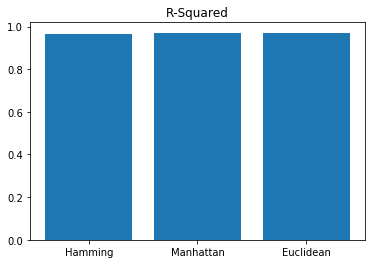

In [27]:
plt.bar(p_names,r2_list)
plt.title('R-Squared')
plt.show()

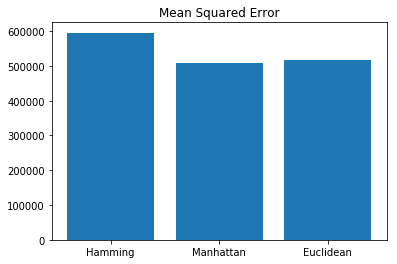

In [28]:
plt.bar(p_names,mse_list)
plt.title('Mean Squared Error')
plt.show()

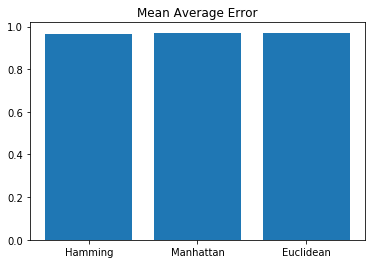

In [29]:
plt.bar(p_names,r2_list)
plt.title('Mean Average Error')
plt.show()

In [30]:
# show all the experiments

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [33]:
pd.DataFrame([r2_list,mse_list,mae_list],columns=p_names,index=['R-Squared','MSE','MAE'])

,Hamming,Manhattan,Euclidean
R-Squared,0.966045,0.971087,0.970575
MSE,595556.668889,507112.173778,516095.685111
MAE,390.455333,373.796667,376.060000


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [14]:
r2_list_k = list()
mse_list_k = list()
mae_list_k = list()
k_list = [2,3,5,7,11,16]
test_taken = 1000
for k in k_list:
    regressor = KNNRegressor(k=k)
    regressor.train(X_train,y_train,categoricals=categoricals)
    y_pred = regressor.predict(X_test[:test_taken],cat_p=1)

    r2_list_k.append(r2_score(y_test[:test_taken],y_pred))
    mse_list_k.append(mean_squared_error(y_test[:test_taken],y_pred))
    mae_list_k.append(mean_absolute_error(y_test[:test_taken],y_pred))


In [15]:
r2_list_k

[0.9695657609710555,
 0.971087287049592,
 0.972099504414142,
 0.9726631427835378,
 0.9707887234417063,
 0.9678380689022147]

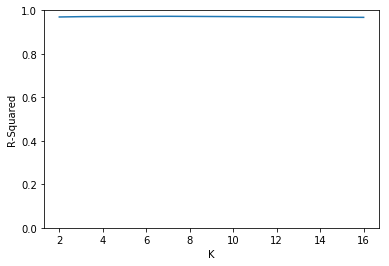

In [21]:
plt.plot(k_list,r2_list_k)
plt.ylim(0,1)
plt.ylabel('R-Squared')
plt.xlabel('K')
plt.show()

4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

R-squared is the measure of explainability of data set by a linear regression model, and is a popular choice when deciding **between** linear and non-linear regression models. The R-Squared more or less remains the same because kNN is dependent on local structure and not global structure for small values of k (which is generally the norm), the R-squared depends on the sudden variation in data, and thus will be more or less similar for all small and close values of k.

R-squared is still a good measure for deciding when choosing between kNN, it's p value, or some other regressor, but for choosing the value of k, R-squared won't observe large deviations.

A better computational measure of k is using cross-validation on MSE (or MAE, or similar error measure).

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [84]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=3)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [85]:
y_preds = regressor.predict(X_test)
y_preds_knn = y_preds.copy()
y_test_knn = y_test.copy()

In [86]:
r2_score(y_test,y_preds)

0.9690046962933991

In [87]:
overall_comp = pd.DataFrame(columns=['R2 Score','MSE','MAE'])
overall_comp.loc['kNN'] = [r2_score(y_test,y_preds),
mean_squared_error(y_test,y_preds),
mean_absolute_error(y_test,y_preds)]

In [88]:
print(regressor._fit_method)

kd_tree


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

**Complexity**
- Scikit-Learn: $O(kN logN)$
- Mine: $O(Ndk)$

**R2 score**
- Scikit-Learn: 0.952
- Mine: 0.970

**Runtime**
- Scikit-Learn: Almost instant
- Mine: 1hr

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


**Advantages**
- Works on manifolds
- Instance based learning
- No training period / Lazy Learner
- Easy to implement

**Disadvantages**
- High time complexity
- High space complexity
- Need feature scaling
- Sensitive to outliers and missing data

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [60]:
class LinearReg():
    def __init__(self):
        pass
    def train(self,X,y,step_size=0.001,iters=5):
        self.weights = np.random.randn(X.shape[1])
        #self.weights = np.zeros(X.shape[1])
        self.bias = np.random.randn()
        self.step_size = step_size
        for iter_n in range(iters):
            for idx,x in enumerate(X):
                curr = self.weights@x + self.bias
                self.weights = self.weights - self.step_size*((curr - y[idx])*x)
                self.bias = self.bias - self.step_size*(curr - y[idx])
    def predict(self,X):
        y = np.zeros(X.shape[0])
        for idx,x in enumerate(X):
            y[idx] = self.weights@x + self.bias
        return y

In [61]:
data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.904097,3.405803,3.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,0.000000,0.000000,0.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,4.000000,6.000000,7.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


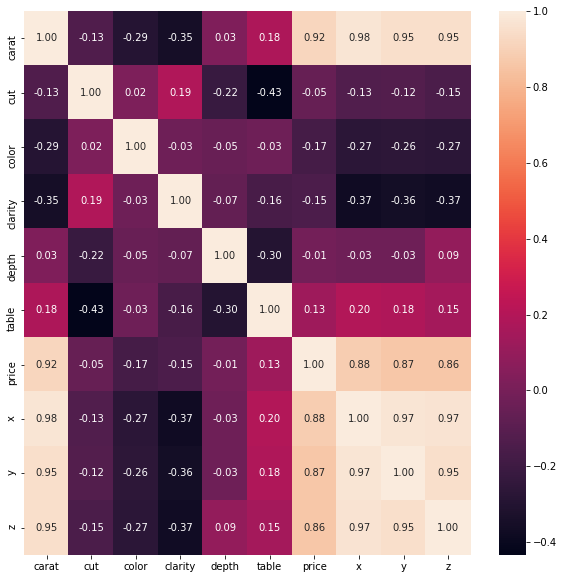

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(np.corrcoef(data,rowvar=False),
            xticklabels=data.columns,
           yticklabels=data.columns,
           annot=True,fmt='.2f')

In [63]:
X = data[['carat','color','clarity','table','table','x']]
y = data['price']
categoricals = [1,2,3]
X = X.to_numpy()
y = y.to_numpy()

X = (X-X.mean(axis=0))/X.std(axis=0)

In [64]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
regressor = LinearReg()
regressor.train(X_train,y_train)

y_preds = regressor.predict(X_test)
y_test_lreg = y_test.copy()
y_preds_lreg = y_preds.copy()

In [66]:
print('R2 score:', r2_score(y_test,y_preds))
print('Mean Squared Error', mean_squared_error(y_test,y_preds))
print('Mean Abs Error', mean_absolute_error(y_test,y_preds))

R2 score: 0.9023984757859743
Mean Squared Error 1551554.0038011589
Mean Abs Error 843.263829103228


In [67]:
lreg_vals = pd.DataFrame(columns=['R2 Score','MSE','MAE'])
lreg_vals.loc['Mine'] = [r2_score(y_test,y_preds),
mean_squared_error(y_test,y_preds),
mean_absolute_error(y_test,y_preds)]

2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [68]:
def corr2_coeff(A, B):
    A_mA = A - A.mean()
    B_mB = B - B.mean()
    ssA = (A_mA**2).sum()
    ssB = (B_mB**2).sum()
    return np.dot(A_mA, B_mB) / np.sqrt(np.dot(ssA,ssB))

In [69]:
corrs = np.eye((data.shape[1]))

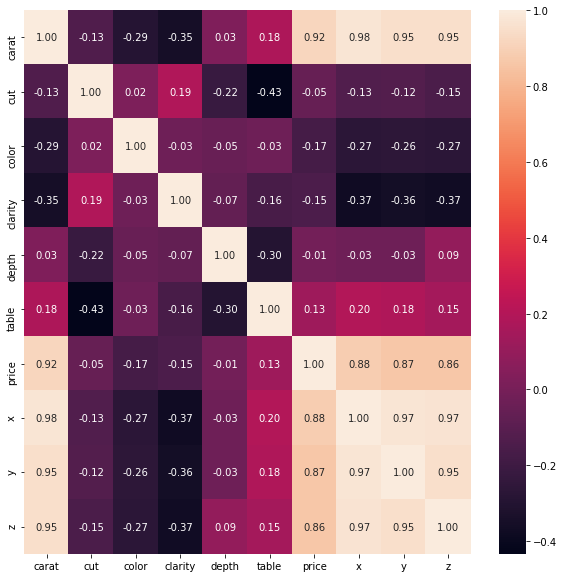

In [70]:
plt.figure(figsize=(10,10))

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        corrs[i,j] = corr2_coeff(data[data.columns[i]],data[data.columns[j]])
sns.heatmap(corrs,
            xticklabels=data.columns,
           yticklabels=data.columns,
           annot=True,fmt='.2f')

Explanation for 2b) - 

Carat, color, clarity, table, x, y and z have absolute cross correlation with price more than 0.10.

However, the variables x,y and z have a high cross correlation among themselves, so we can take only one of them, so we chose x, as that has highest correlation with price.

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_preds = regressor.predict(X_test)

In [73]:
print('R2 score:', r2_score(y_test,y_preds))
print('Mean Squared Error', mean_squared_error(y_test,y_preds))
print('Mean Abs Error', mean_absolute_error(y_test,y_preds))

R2 score: 0.9036157752958263
Mean Squared Error 1532202.810840336
Mean Abs Error 821.2235552483422


In [74]:
lreg_vals.loc['Scikit Learn'] = [r2_score(y_test,y_preds),
mean_squared_error(y_test,y_preds),
mean_absolute_error(y_test,y_preds)]

In [75]:
lreg_vals

,R2 Score,MSE,MAE
Mine,0.902398,1.551554e+06,843.263829
Scikit Learn,0.903616,1.532203e+06,821.223555


Results from scikit-learn library linear regression are slightly better than my results.

2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


In [89]:
X = data[['carat', 'cut', 'color', 'clarity', 'depth', 'table',  'x', 'y','z']]
y = data['price']
categoricals = [1,2,3]
X = X.to_numpy()
y = y.to_numpy()

X = (X-X.mean(axis=0))/X.std(axis=0)

In [90]:
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [91]:
regressor = LinearReg()
regressor.train(X_train,y_train)

y_preds = regressor.predict(X_test)
y_test_lreg = y_test.copy()
y_preds_lreg = y_preds.copy()

In [92]:
print('R2 score:', r2_score(y_test,y_preds))
print('Mean Squared Error', mean_squared_error(y_test,y_preds))
print('Mean Abs Error', mean_absolute_error(y_test,y_preds))

R2 score: 0.9035956053863345
Mean Squared Error 1532523.4482902146
Mean Abs Error 838.2495750834772


In [93]:
overall_comp.loc['Linear Regression'] = [r2_score(y_test,y_preds),
mean_squared_error(y_test,y_preds),
mean_absolute_error(y_test,y_preds)]

In [94]:
lreg_vals.loc['Full Dataset - Mine'] = [r2_score(y_test,y_preds),
mean_squared_error(y_test,y_preds),
mean_absolute_error(y_test,y_preds)]

In [95]:
lreg_vals

,R2 Score,MSE,MAE
Mine,0.902398,1.551554e+06,843.263829
Scikit Learn,0.903616,1.532203e+06,821.223555
Full Dataset - Mine,0.903596,1.532523e+06,838.249575


The results improved very very slightly. This indicates that the variables that were ignored don't have much noise, and however lower their correlation, they provide a little bit more information.

Furthermore, it does confirm that we don't need to consider the variables that already have a  very high correlation with some other attribute (such as y and z had high correlation with x).

2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


In [96]:
overall_comp

,R2 Score,MSE,MAE
kNN,0.969005,4.927268e+05,361.264090
Linear Regression,0.903596,1.532523e+06,838.249575


The kNN algorithm is far better than Linear Regression in final comparison metrics.
This is because:
1. kNN can fit on non linear data also.
2. kNN works well on manifolds.
3. Given large dataset size, the curse of dimensionality does little harm to kNN in this case.
4. Even in high dimensionality, in case the data lies on a manifold, the problem of curse of dimensionality is reduced significantly.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


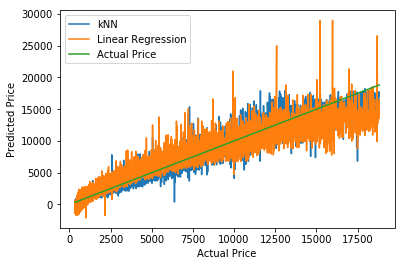

In [99]:
idxs = np.argsort(y_test_knn)

plt.plot(y_test_knn[idxs],y_preds_knn[idxs],label='kNN')
plt.plot(y_test_lreg[idxs],y_preds_lreg[idxs],label='Linear Regression')
plt.plot(y_test_lreg[idxs],y_test_lreg[idxs],label='Actual Price')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# **KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [3]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [4]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

--2021-02-06 13:17:17--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving proxy.iiit.ac.in (proxy.iiit.ac.in)... 10.4.21.120
Connecting to proxy.iiit.ac.in (proxy.iiit.ac.in)|10.4.21.120|:8080... connected.
Proxy request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  5.90MB/s    in 28s     

2021-02-06 13:17:45 (5.83 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [5]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

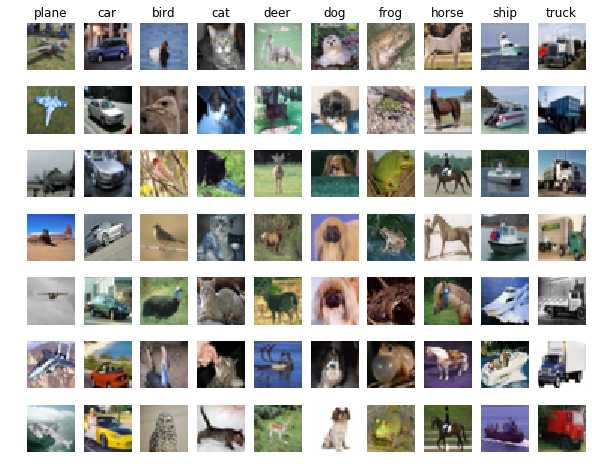

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [7]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [8]:
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass
    
    def train(self,X,y):
        self.X = X
        self.y = y
        
    def distanceL2(self,x1,x2):
        return np.sqrt(np.sum((x1-x2)**2))
    
    def compute_distances_two_loops(self,X):
        distances = np.zeros((X.shape[0],self.X.shape[0]))
        pbar = tqdm(total=X.shape[0])
        for idx,x in enumerate(X):
            for jdx,trainx in enumerate(self.X):
                distances[idx,jdx] = self.distanceL2(trainx,x)
            pbar.update()
        pbar.refresh()
        return distances
    def compute_distances_one_loops(self,X):
        distances = np.zeros((X.shape[0],self.X.shape[0]))
        pbar = tqdm(total=X.shape[0])
        for idx,x in enumerate(X):
            distances[idx] = np.sqrt(np.sum((self.X-x)**2,axis=1))
            #distances[idx] = np.vectorize(self.distanceL2,signature='(n),(n)->()')(self.X,x)
            pbar.update()
        pbar.refresh()
        return distances
    
    def per_compute_distances_no_loops(self,x):
        return np.vectorize(self.distanceL2,signature='(n),(n)->()')(self.X,x)
    def compute_distances_no_loops(self,X):
#         distances = np.zeros((X.shape[0],self.X.shape[0]))
#         distances= np.vectorize(self.per_compute_distances_no_loops,signature='(n)->(m)')(X)
        distances = np.sqrt(np.sum((self.X[:,None]-X)**2,axis=2)).T
        return distances
    def predict_labels(self,dists,k=3):
        y = np.zeros(dists.shape[0])
        for didx, dist in enumerate(dists):
            idx = np.argpartition(dist, k)
            possible_ys = self.y[idx[:k]]
            unique, counts = np.unique(possible_ys, return_counts=True)
            y[didx] = sorted(list(zip(unique, counts)),key=lambda x: x[1])[-1][0]
        return y

Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [9]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [14]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [150]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [151]:
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))
# Use this cell to compute accuracies for k = 3, 5, 7

k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [15]:
# Use this cell to call the functions
start_time = time.time()
dists = classifier.compute_distances_two_loops(X_test)
print('Two loops, time taken: {} seconds'.format(time.time()-start_time))

Two loops, time taken: 41.54048204421997 seconds


In [12]:
start_time = time.time()
dists = classifier.compute_distances_one_loops(X_test)
print('One loop, time taken: {} seconds'.format(time.time()-start_time))

One loop, time taken: 33.770911693573 seconds


In [16]:
start_time = time.time()
dists = classifier.compute_distances_no_loops(X_test)
print('No loops, time taken: {} seconds'.format(time.time()-start_time))

No loops, time taken: 39.75618815422058 seconds


Numpy is optimized for vector operations. However handling a lot of memory at the same time causes too many cache misses. Thus, 1 loop is the fastest, followed by no loop followed by 2 loops.

Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [17]:
# Use this cell to call the functions
start_time = time.time()
dists = classifier.compute_distances_two_loops(X_test)
print('Two loops, time taken: {} seconds'.format(time.time()-start_time))
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))

start_time = time.time()
dists = classifier.compute_distances_one_loops(X_test)
print('One loop, time taken: {} seconds'.format(time.time()-start_time))
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))

start_time = time.time()
dists = classifier.compute_distances_no_loops(X_test)
print('No loops, time taken: {} seconds'.format(time.time()-start_time))
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))


Two loops, time taken: 41.60369658470154 seconds
k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000



One loop, time taken: 33.56493091583252 seconds
k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000
No loops, time taken: 39.692336320877075 seconds
k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [167]:
np.arange(20).reshape((4,5)).mean(1)

array([ 2.,  7., 12., 17.])

In [173]:
r = 5
# np.random.shuffle(X_train)
divisions = [int((i)/r*(X_train.shape[0])) for i in range(r+1)]
errors_k = list()
ks = [1,3,5,7]
accuracies = np.zeros((len(ks),r))
for i in range(r):
    classifier = KNearestNeighbor()
    X_train_ = np.vstack([X_train[:divisions[i]],X_train[divisions[i+1]:]])
    y_train_ = np.concatenate((y_train[:divisions[i]],y_train[divisions[i+1]:]))
    X_test_ = X_train[divisions[i]:divisions[i+1]]
    y_test_ = y_train[divisions[i]:divisions[i+1]]

    classifier.train(X_train_, y_train_)

    dists = classifier.compute_distances_no_loops(X_test_)

    for k_idx,k in enumerate(ks):    
        y_test_pred = classifier.predict_labels(dists, k=k)
        num_correct = np.sum(y_test_pred == y_test_)
        accuracy = float(num_correct) / y_test_.shape[0]
        print(k,i,accuracy)
        accuracies[k_idx,i] = accuracy
    
print(accuracies)
accs_k = np.mean(accuracies,axis=1)
print("Optimal k =",ks[np.argmax(accs_k)])

1 0 0.263
3 0 0.252
5 0 0.266
7 0 0.261
1 1 0.257
3 1 0.281
5 1 0.285
7 1 0.298
1 2 0.264
3 2 0.266
5 2 0.29
7 2 0.295
1 3 0.278
3 3 0.29
5 3 0.303
7 3 0.295
1 4 0.266
3 4 0.281
5 4 0.284
7 4 0.293
[[0.263 0.257 0.264 0.278 0.266]
 [0.252 0.281 0.266 0.29  0.281]
 [0.266 0.285 0.29  0.303 0.284]
 [0.261 0.298 0.295 0.295 0.293]]
Optimal k = 7


In [175]:
accs_k

array([0.2656, 0.274 , 0.2856, 0.2884])

Optimal Value of k = 7

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




In [189]:
mean_x = np.vstack([X_train,X_test]).mean()
print(mean_x)
X_train_ = X_train-mean_x
X_test_ = X_test - mean_x

120.73323100142045


In [190]:
X_train_.mean()

-0.27599760298294873

In [191]:
classifier = KNearestNeighbor()
classifier.train(X_train_, y_train)
dists = classifier.compute_distances_no_loops(X_test_)
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))

k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000


In [192]:
mean_x = np.vstack([X_train,X_test]).mean(axis=0)
print(mean_x.shape)

(3072,)


In [193]:
X_train_ = X_train-mean_x
X_test_ = X_test - mean_x

In [196]:
X_train_.mean()

-0.27599760298295284

In [197]:
classifier = KNearestNeighbor()
classifier.train(X_train_, y_train)
dists = classifier.compute_distances_no_loops(X_test_)
for k in [1,3,5,7]:
    y_test_pred = classifier.predict_labels(dists, k=k)

    # Compute and print the fraction of correctly predicted examples
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    print('k=%d Got %d / %d correct => accuracy: %f' % (k,num_correct, num_test, accuracy))

k=1 Got 137 / 500 correct => accuracy: 0.274000
k=3 Got 142 / 500 correct => accuracy: 0.284000
k=5 Got 143 / 500 correct => accuracy: 0.286000
k=7 Got 151 / 500 correct => accuracy: 0.302000


1. No change in accuracy. This is because the data given is already in a fixed range and even after that we are subtracting the entire vector by the same value. We need to subtract mean, and ideally also divide by standard deviation, for images, when using Deep Learning, to keep the gradients in limit. Here we don't need to do such a thing. This is for minkowski distances. Suppose it would have been distance metric like Cosine Distance, the accuracy would've been decreased, as, mean+$\delta$ and mean-$\delta$ should not make much difference in images, but in cosine distance, the distance metric will have a sudden increase.


2. No change in accuracy. This is because the data given is already in a fixed range and even though we are subtracting value of different attributes by respective means, it still makes little difference. We need to subtract mean, and ideally also divide by standard deviation, for images, when using Deep Learning, to keep the gradients in limit. Here we don't need to do such a thing. This is for minkowski distances. Suppose it would have been distance metric like Cosine Distance, the accuracy would've been decreased, as, mean+$\delta$ and mean-$\delta$ should not make much difference in images, but in cosine distance, the distance metric will have a sudden increase.


3. kNN is Lazy Learner, and Instance Based Classifier. Thus takes no training time.
For our current bruteforce kNN classifier, the Testing Time Complexity is $O(Ndk)$ for each sample.
kNN can learn any type of boundary.

4. We can use PCA to decide linear combinations of the given attributes as the important features for this dataset. However I believe showing and plotting them is out of the scope of current assignment. :)

# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [13]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
data['Diagnosis'].unique()

array([2, 4])

In [15]:
data.columns

Index(['CT', 'UCSize', 'UCShape', 'MA', 'SECSize', 'BN', 'BC', 'NN', 'Mitoses',
       'Diagnosis'],
      dtype='object')

In [16]:
[ (x,data[x].dtype) for x in data.columns]

[('CT', dtype('int64')),
 ('UCSize', dtype('int64')),
 ('UCShape', dtype('int64')),
 ('MA', dtype('int64')),
 ('SECSize', dtype('int64')),
 ('BN', dtype('float64')),
 ('BC', dtype('int64')),
 ('NN', dtype('int64')),
 ('Mitoses', dtype('int64')),
 ('Diagnosis', dtype('int64'))]

In [19]:
X = data[['CT', 'UCSize', 'UCShape', 'MA', 'SECSize', 'BN', 'BC', 'NN', 'Mitoses']].to_numpy()
y = data['Diagnosis'].to_numpy()
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2,random_state=42)

In [20]:
sort_idxs = np.argsort(X_train[:,1])

np.vstack([X_train[:,1][sort_idxs],y_train[sort_idxs]]).T

array([[ 1.,  2.],
       [ 1.,  2.],
       [ 1.,  2.],
       ...,
       [10.,  4.],
       [10.,  4.],
       [10.,  4.]])

1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [21]:
class Node:
    def __init__(self,gini,n_samples,n_samples_per_class,pred_class):
        self.gini=gini
        self.n_samples = n_samples
        self.n_samples_per_class = n_samples_per_class
        self.pred_class = pred_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

In [22]:
class DecisionTree():
    def __init__(self,max_depth=None,metric='gini'):
        self.max_depth = max_depth
        self.metric = metric
        
    def train(self,X,y):
        self.classes = np.unique(y)
        self.num_attrs = X.shape[1]
        self.tree = self._make_tree(X,y)
        
    def _score(self, y, m=None):
        if self.metric == 'gini':
            return self._gini(y,m)
        elif self.metric == 'entropy':
            return self._entropy(y,m)
        elif self.metric == 'mce': # Misclassification error
            return self._mce(y,m)
        
        print('Invalid Metric')
        return 1
    
    def _mce(self, y, m=None):
        if m is None:
            if y.size == 0:
                return 0
            num_parent = np.array([np.sum(y==c) for c in self.classes])
            mce_node = 1.0 - (np.max(num_parent)/y.size)
        else:
            num_parent = y
            mce_node = 1.0 - (np.max(num_parent)/m)
        return mce_node

    def _entropy(self, y, m=None):
        if m is None:
            if y.size == 0:
                return 0
            num_parent = np.array([np.sum(y==c) for c in self.classes])            
            entropy_node = -np.sum(np.log2(num_parent[num_parent!=0]/y.size) * num_parent[num_parent!=0])/y.size
        else:
            num_parent = y
            entropy_node = -np.sum(np.log2(num_parent[num_parent!=0]/m) * num_parent[num_parent!=0])/m
        return entropy_node
            
    def _gini(self,y,m=None):
        if m is None:
            m = y.size
            num_parent = np.array([np.sum(y==c) for c in self.classes],dtype=np.float)
            gini_node = 1.0 - np.sum((num_parent/y.size)**2)
        else:
            num_parent = y
            gini_node = 1.0 - np.sum((num_parent/m)**2)
        return gini_node
        
        
    def _split(self, X,y):
        """
        returns best attribute to split on, best threshold to split on
        returns None, None if pure
        """
        m = y.shape[0]
        if m<=1:
            return None,None
        gini_node = self._score(y)
        num_parent = np.array([np.sum(y==c) for c in self.classes])
        attr, thres = None,None
        
        best_gini = gini_node
        for idx in range(self.num_attrs):
            sort_idxs = np.argsort(X_train[:,idx])
            thresholds = X_train[:,idx][sort_idxs]
            classes = y_train[sort_idxs]
            
            num_left = np.zeros(self.classes.size)
            num_right = num_parent.copy()
            
            for i in range(1,m):
                c = np.where(self.classes==classes[i - 1])
                num_left[c] += 1
                num_right[c] -= 1
                
                gini_left = self._score(num_left,i)
                gini_right = self._score(num_right,m-i)
                
                gini = (i * gini_left + (m - i) * gini_right) / m

                if thresholds[i] == thresholds[i - 1]:
                    continue
                
                if gini < best_gini:
                    best_gini = gini
                    attr = idx
                    thres = (thresholds[i] + thresholds[i - 1]) / 2 
        return attr, thres
    def _make_tree(self,X,y,depth=0):
        n_samples_per_class = [np.sum(y == i) for i in self.classes]
        pred_class = self.classes[np.argmax(n_samples_per_class)]
        node = Node(
            gini=self._score(y), n_samples=y.size,
            n_samples_per_class=n_samples_per_class, pred_class=pred_class)
        
        if (self.max_depth is None) or (depth < self.max_depth):
            idx, thr = self._split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._make_tree(X_left, y_left, depth + 1)
                node.right = self._make_tree(X_right, y_right, depth + 1)
        return node
    def _predict(self,x):
        node = self.tree
        while node.left:
            if x[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.pred_class
    def predict(self,X):
        return np.vectorize(self._predict,signature='(n)->()')(X)

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [25]:
from sklearn.metrics import f1_score

In [27]:
for metric in ['gini','entropy','mce']:
    tree = DecisionTree(max_depth=10,metric=metric)
    tree.train(X_train,y_train)

    y_preds = tree.predict(X_test)
    print("%s: %f"% (metric,accuracy_score(y_test,y_preds)))

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


gini: 0.907143


/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log2


entropy: 0.928571
mce: 0.907143


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [24]:
for metric in ['gini','entropy','mce']:
    tree = DecisionTree(max_depth=10,metric=metric)
    tree.train(X_train,y_train)

    y_preds = tree.predict(X_test)
    print("%s: %f"% (metric,accuracy_score(y_test,y_preds)))

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


gini: 0.907143


/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log2


entropy: 0.928571
mce: 0.907143


1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [41]:
r = 5
# np.random.shuffle(X_train)
divisions = [int((i)/r*(X_train.shape[0])) for i in range(r+1)]
errors_k = list()
depths = [1,2,5,6,7,8,9,10,11]
metrics = ['gini','entropy','mce']
accuracies = np.zeros((len(metrics),len(depths),r))
for m_idx, metric in enumerate(metrics):
    for k_idx,k in enumerate(depths):
        classifier = DecisionTree(max_depth=k,metric=metric)
        for i in range(r):
            X_train_ = np.vstack([X_train[:divisions[i]],X_train[divisions[i+1]:]])
            y_train_ = np.concatenate((y_train[:divisions[i]],y_train[divisions[i+1]:]))
            X_test_ = X_train[divisions[i]:divisions[i+1]]
            y_test_ = y_train[divisions[i]:divisions[i+1]]

            classifier.train(X_train_, y_train_)
            y_test_pred = classifier.predict(X_test_)
            accuracy = accuracy_score(y_test_,y_test_pred)
            print(metric,k,i,accuracy)
            accuracies[m_idx,k_idx,i] = accuracy

print(accuracies)

gini 1 0 0.8648648648648649
gini 1 1 0.7857142857142857
gini 1 2 0.8839285714285714
gini 1 3 0.8571428571428571
gini 1 4 0.8392857142857143


/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


gini 2 0 0.8288288288288288
gini 2 1 0.9196428571428571
gini 2 2 0.9375
gini 2 3 0.9285714285714286
gini 2 4 0.8571428571428571
gini 5 0 0.8288288288288288
gini 5 1 0.9196428571428571
gini 5 2 0.9375
gini 5 3 0.9285714285714286
gini 5 4 0.8571428571428571
gini 6 0 0.8288288288288288
gini 6 1 0.9196428571428571
gini 6 2 0.9375
gini 6 3 0.9285714285714286
gini 6 4 0.8571428571428571
gini 7 0 0.8288288288288288
gini 7 1 0.9196428571428571
gini 7 2 0.9375
gini 7 3 0.9285714285714286
gini 7 4 0.8571428571428571
gini 8 0 0.8288288288288288
gini 8 1 0.9196428571428571
gini 8 2 0.9375
gini 8 3 0.9285714285714286
gini 8 4 0.8571428571428571
gini 9 0 0.8288288288288288
gini 9 1 0.9196428571428571
gini 9 2 0.9375
gini 9 3 0.9285714285714286
gini 9 4 0.8571428571428571
gini 10 0 0.8288288288288288
gini 10 1 0.9196428571428571
gini 10 2 0.9375
gini 10 3 0.9285714285714286
gini 10 4 0.8571428571428571
gini 11 0 0.8288288288288288
gini 11 1 0.9196428571428571
gini 11 2 0.9375
gini 11 3 0.928571428571

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:41: RuntimeWarning: invalid value encountered in log2


entropy 1 1 0.875
entropy 1 2 0.875
entropy 1 3 0.8125
entropy 1 4 0.7767857142857143
entropy 2 0 0.8378378378378378
entropy 2 1 0.875
entropy 2 2 0.8839285714285714
entropy 2 3 0.8214285714285714
entropy 2 4 0.7857142857142857
entropy 5 0 0.8378378378378378
entropy 5 1 0.875
entropy 5 2 0.8839285714285714
entropy 5 3 0.8214285714285714
entropy 5 4 0.7857142857142857
entropy 6 0 0.8378378378378378
entropy 6 1 0.875
entropy 6 2 0.8839285714285714
entropy 6 3 0.8214285714285714
entropy 6 4 0.7857142857142857
entropy 7 0 0.8378378378378378
entropy 7 1 0.875
entropy 7 2 0.8839285714285714
entropy 7 3 0.8214285714285714
entropy 7 4 0.7857142857142857
entropy 8 0 0.8378378378378378
entropy 8 1 0.875
entropy 8 2 0.8839285714285714
entropy 8 3 0.8214285714285714
entropy 8 4 0.7857142857142857
entropy 9 0 0.8378378378378378
entropy 9 1 0.875
entropy 9 2 0.8839285714285714
entropy 9 3 0.8214285714285714
entropy 9 4 0.7857142857142857
entropy 10 0 0.8378378378378378
entropy 10 1 0.875
entropy 10 

In [40]:
np.mean(accuracies,axis=2)

array([[0.89433719, 0.89433719, 0.89433719, 0.89433719, 0.89433719,
        0.89433719, 0.89433719, 0.89433719],
       [0.84078185, 0.84078185, 0.84078185, 0.84078185, 0.84078185,
        0.84078185, 0.84078185, 0.84078185],
       [0.92308559, 0.92665701, 0.92665701, 0.92665701, 0.92665701,
        0.92665701, 0.92665701, 0.92665701]])

In [30]:
accs_k = np.mean(accuracies,axis=2)
print("Optimal metric = %s; Optimal Depth = %d"%(metrics[np.argmax(accs_k)[0]],depths[np.argmax(accs_k)[1]]))

/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


5 0 0.8288288288288288
5 1 0.9196428571428571
5 2 0.9375
5 3 0.9285714285714286
5 4 0.8571428571428571
6 0 0.8288288288288288
6 1 0.9196428571428571
6 2 0.9375
6 3 0.9285714285714286
6 4 0.8571428571428571
7 0 0.8288288288288288
7 1 0.9196428571428571
7 2 0.9375
7 3 0.9285714285714286
7 4 0.8571428571428571
8 0 0.8288288288288288
8 1 0.9196428571428571
8 2 0.9375
8 3 0.9285714285714286
8 4 0.8571428571428571
9 0 0.8288288288288288
9 1 0.9196428571428571
9 2 0.9375
9 3 0.9285714285714286
9 4 0.8571428571428571
10 0 0.8288288288288288
10 1 0.9196428571428571
10 2 0.9375
10 3 0.9285714285714286
10 4 0.8571428571428571
11 0 0.8288288288288288
11 1 0.9196428571428571
11 2 0.9375
11 3 0.9285714285714286
11 4 0.8571428571428571
5 0 0.8288288288288288
5 1 0.9196428571428571
5 2 0.9375
5 3 0.9285714285714286
5 4 0.8571428571428571
6 0 0.8288288288288288
6 1 0.9196428571428571
6 2 0.9375
6 3 0.9285714285714286
6 4 0.8571428571428571
7 0 0.8288288288288288
7 1 0.9196428571428571
7 2 0.9375
7 3 0.

IndexError: invalid index to scalar variable.

1. e) Does standardisation and normalisation help in this case? Report

Answer: No, standardisation and normalisation doesn't help in this case as we are comparing every attribute individually.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

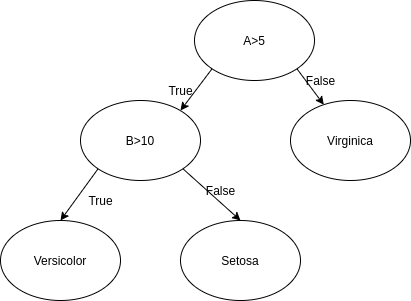
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




In [49]:
def printInorder(root,spaces=0):
    if root.left:
        print('  '*spaces,end='')
        print('Is {}>{}'.format(data.columns[root.feature_index],root.threshold))
        print('  '*spaces,end='')
        print('True Branch')
        printInorder(root.left,spaces=spaces+1)
        print('  '*spaces,end='')
        print('False Branch')
        printInorder(root.right,spaces=spaces+1)
    else:
        print('  '*spaces,end='')
        print(root.pred_class)

In [59]:
tree = DecisionTree(max_depth=3,metric='gini')
tree.train(X_train,y_train)
y_preds = tree.predict(X_test)
print("Accuracy: %f"% (accuracy_score(y_test,y_preds),))

import sys

orig_stdout = sys.stdout
f = open('outputimp.txt', 'w')
sys.stdout = f

printInorder(tree.tree)

sys.stdout = orig_stdout
f.close()


Accuracy: 0.907143


/home/varunc/env/lib/python3.7/site-packages/ipykernel_launcher.py:48: RuntimeWarning: invalid value encountered in true_divide


4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: